The objective is to analyze the Melbourne housing market by answering key questions to provide valuable insights for prospective home buyers.

In [2]:
# imports
import pandas as pd  
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv('melb_data.csv')

In [4]:
# Look at the data
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [6]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
# missing data
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

The dataset includes a mix of categorical and numeric variables. Some variables have missing values, but the target variable, price, is a float and contains no missing values.

In [8]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


There are some varaibles probably need to take some focus:

The range for the Price is really large from 85,000 to 9,000,000.
Some of the property do not have bedroom and bathroom.
The landsize and building area have some value in zero, and there maximum value are really large.
The oldest year built is in 1196 which possibly entry mistake.


Let first look at the year built before 1800

In [14]:
df[df['YearBuilt']<1800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
9968,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,...,1.0,4.0,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0


Comparing to the house that built in Mount Waverley, the house in this suburb probably built in 1900s or later

In [23]:
df[df['Suburb']=='Mount Waverley'].tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13238,Mount Waverley,34 Park La,3,h,1586000.0,S,Stockdale,23/09/2017,14.2,3149.0,...,1.0,1.0,718.0,138.0,1955.0,NaN,-37.88061,145.12449,Eastern Metropolitan,13366.0
13239,Mount Waverley,8 Susan Ct,4,h,1408000.0,S,Jellis,23/09/2017,14.2,3149.0,...,2.0,2.0,692.0,179.0,1970.0,NaN,-37.86445,145.12538,Eastern Metropolitan,13366.0
13502,Mount Waverley,15 Anthony Dr,3,h,1028800.0,S,Jellis,26/08/2017,14.2,3149.0,...,2.0,1.0,470.0,118.0,1960.0,NaN,-37.88751,145.13545,Eastern Metropolitan,13366.0
13503,Mount Waverley,17 Huntingtower Cr,6,h,1840000.0,S,Jellis,26/08/2017,14.2,3149.0,...,2.0,2.0,554.0,368.0,1999.0,NaN,-37.87591,145.13958,Eastern Metropolitan,13366.0
13504,Mount Waverley,2/392 Stephensons Rd,3,t,1035000.0,SP,McGrath,26/08/2017,14.2,3149.0,...,2.0,2.0,236.0,138.0,2006.0,NaN,-37.88678,145.12748,Eastern Metropolitan,13366.0


Let's correct the entry mistake.

In [24]:
df.loc[df['YearBuilt'] == 1196, 'YearBuilt'] = 1996

For missing data in CouncilArea, we try to make a dictionary mapping from Suburb to CouncilArea

In [31]:
# Create a mapping from Suburb to CouncilArea
suburb_to_council = df.dropna(subset=['CouncilArea']).groupby('Suburb')['CouncilArea'].agg(lambda x: x.mode().iloc[0]).to_dict()

suburb_to_council

{'Abbotsford': 'Yarra',
 'Aberfeldie': 'Moonee Valley',
 'Airport West': 'Moonee Valley',
 'Albanvale': 'Brimbank',
 'Albert Park': 'Port Phillip',
 'Albion': 'Brimbank',
 'Alphington': 'Darebin',
 'Altona': 'Hobsons Bay',
 'Altona Meadows': 'Hobsons Bay',
 'Altona North': 'Hobsons Bay',
 'Ardeer': 'Brimbank',
 'Armadale': 'Stonnington',
 'Ascot Vale': 'Moonee Valley',
 'Ashburton': 'Boroondara',
 'Ashwood': 'Monash',
 'Aspendale': 'Kingston',
 'Aspendale Gardens': 'Kingston',
 'Avondale Heights': 'Moonee Valley',
 'Bacchus Marsh': 'Moorabool',
 'Balaclava': 'Port Phillip',
 'Balwyn': 'Boroondara',
 'Balwyn North': 'Boroondara',
 'Bayswater': 'Knox',
 'Bayswater North': 'Maroondah',
 'Beaconsfield': 'Cardinia',
 'Beaconsfield Upper': 'Cardinia',
 'Beaumaris': 'Bayside',
 'Bellfield': 'Banyule',
 'Bentleigh': 'Glen Eira',
 'Bentleigh East': 'Glen Eira',
 'Berwick': 'Casey',
 'Black Rock': 'Bayside',
 'Blackburn': 'Whitehorse',
 'Blackburn North': 'Whitehorse',
 'Blackburn South': 'White

The function to fill in the missing data in council area

In [32]:
def fill_council_area(row):
    if pd.isnull(row['CouncilArea']):
        return suburb_to_council.get(row['Suburb'], row['CouncilArea'])
    else:
        return row['CouncilArea']

filling missing data in council area

In [33]:
df.loc[df['CouncilArea'].isnull(), 'CouncilArea'] = df.loc[df['CouncilArea'].isnull()].apply(fill_council_area, axis=1)


In [39]:
df[df['CouncilArea'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12251,Burnside,22 Paringa Wy,3,h,657500.0,SP,Harcourts,3/09/2017,14.8,3023.0,...,2.0,2.0,631.0,NaN,NaN,NaN,-37.75225,144.75520,Western Metropolitan,1607.0
12438,Attwood,2 Herod Pl,3,h,640000.0,SP,YPA,9/09/2017,16.5,3049.0,...,2.0,2.0,607.0,NaN,NaN,NaN,-37.67379,144.89826,Northern Metropolitan,1130.0
12865,Wallan,14 Danaher Av,3,h,366000.0,S,Ray,16/09/2017,44.2,3756.0,...,1.0,1.0,502.0,77.0,1978.0,NaN,-37.40853,144.97749,Northern Victoria,3988.0
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,...,3.0,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0
13264,Plumpton,9 Remy Av,4,h,625500.0,SP,HAR,23/09/2017,23.8,3335.0,...,2.0,2.0,477.0,178.0,2012.0,NaN,-37.71429,144.72492,Western Metropolitan,1490.0
13381,Burnside,18 Fydler Av,3,h,580000.0,S,YPA,26/08/2017,14.8,3023.0,...,2.0,2.0,461.0,174.0,2000.0,NaN,-37.74518,144.74708,Western Metropolitan,1607.0
13494,Monbulk,21 David St,4,h,720000.0,SP,Fletchers,26/08/2017,34.1,3793.0,...,2.0,2.0,1611.0,NaN,NaN,NaN,-37.87931,145.41288,Eastern Victoria,1424.0


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

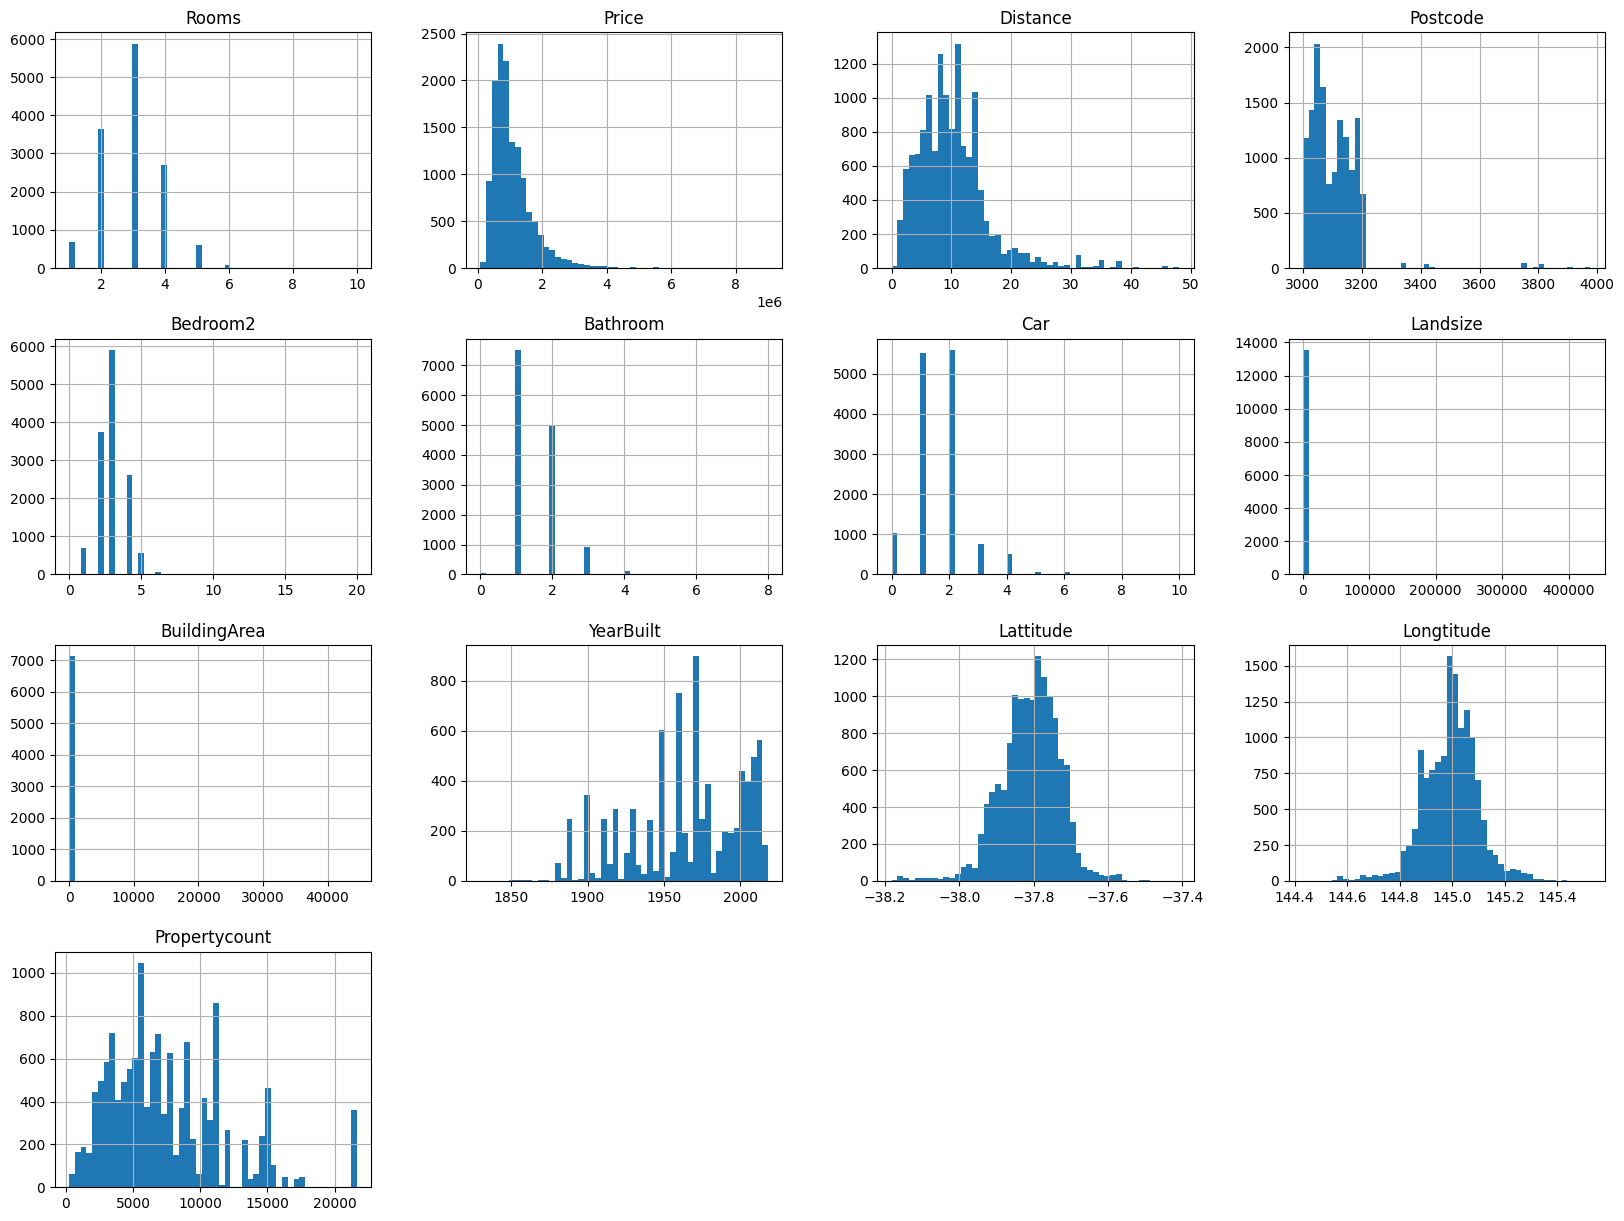

In [40]:
# check for the data distribution
df.hist(bins=50, figsize=(20,15))

Most of the landsize and built area are zero which probably appartment. 
Few of the bedroom and bathroom are zero.
The price and distance are little bit left skew.

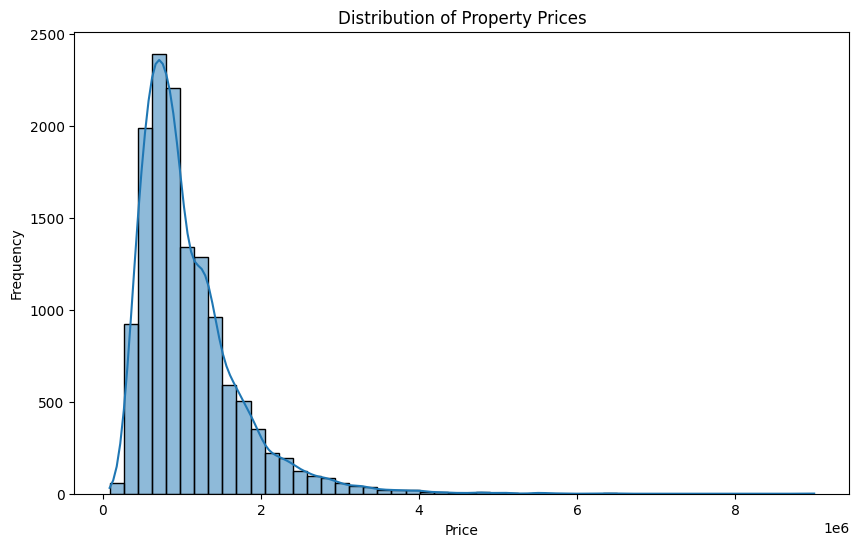

In [41]:
# Plot the distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

compare the price with the property characteristics

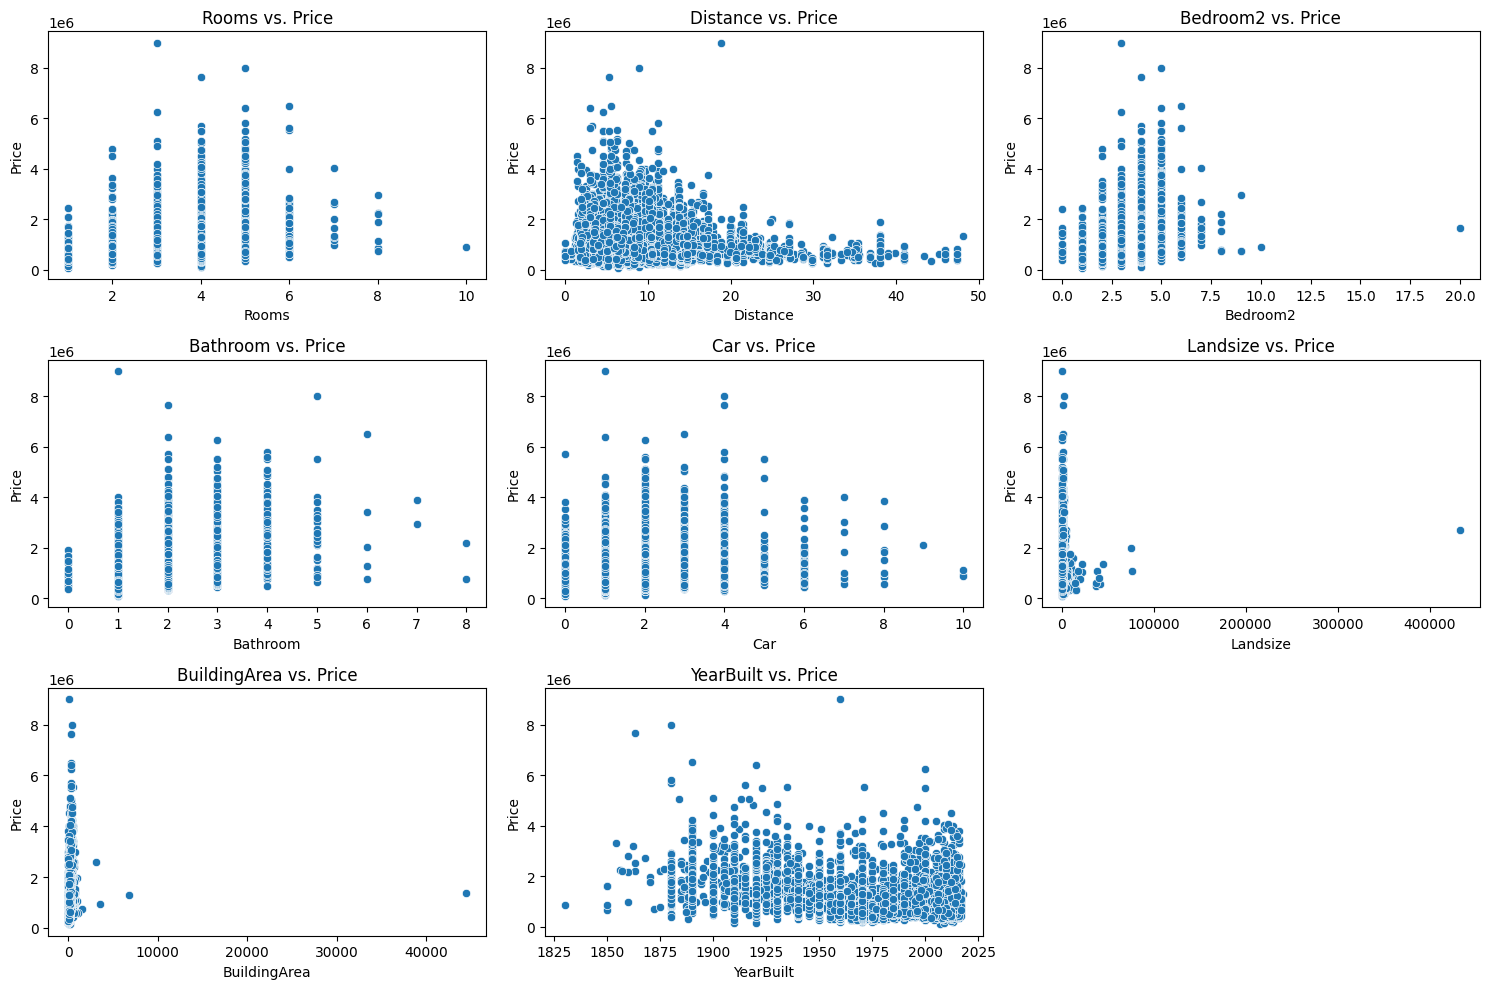

In [43]:
# Plot scatter plots of property characteristics vs. price
characteristics = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']

plt.figure(figsize=(15, 10))
for i, characteristic in enumerate(characteristics, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[characteristic], y=df['Price'])
    plt.title(f'{characteristic} vs. Price')
    plt.xlabel(characteristic)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()




The room have the high correlation with the price

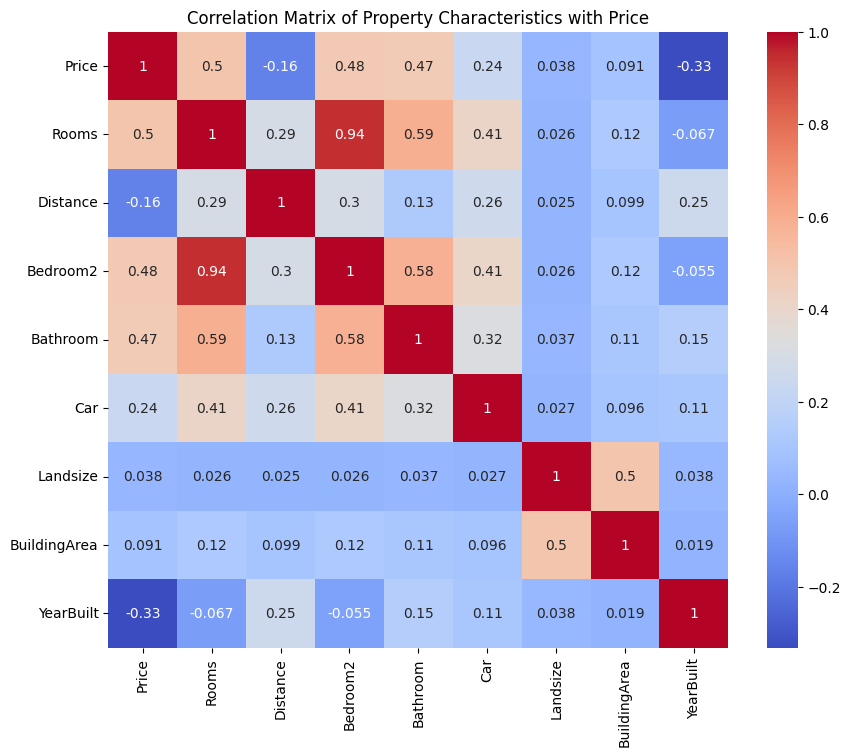

In [44]:
# Calculate correlation matrix
correlation_matrix = df[['Price'] + characteristics].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Property Characteristics with Price')
plt.show()

We can make a hypothesis that larger properties with more rooms and modern buildings tend to have higher prices.

Location analysis

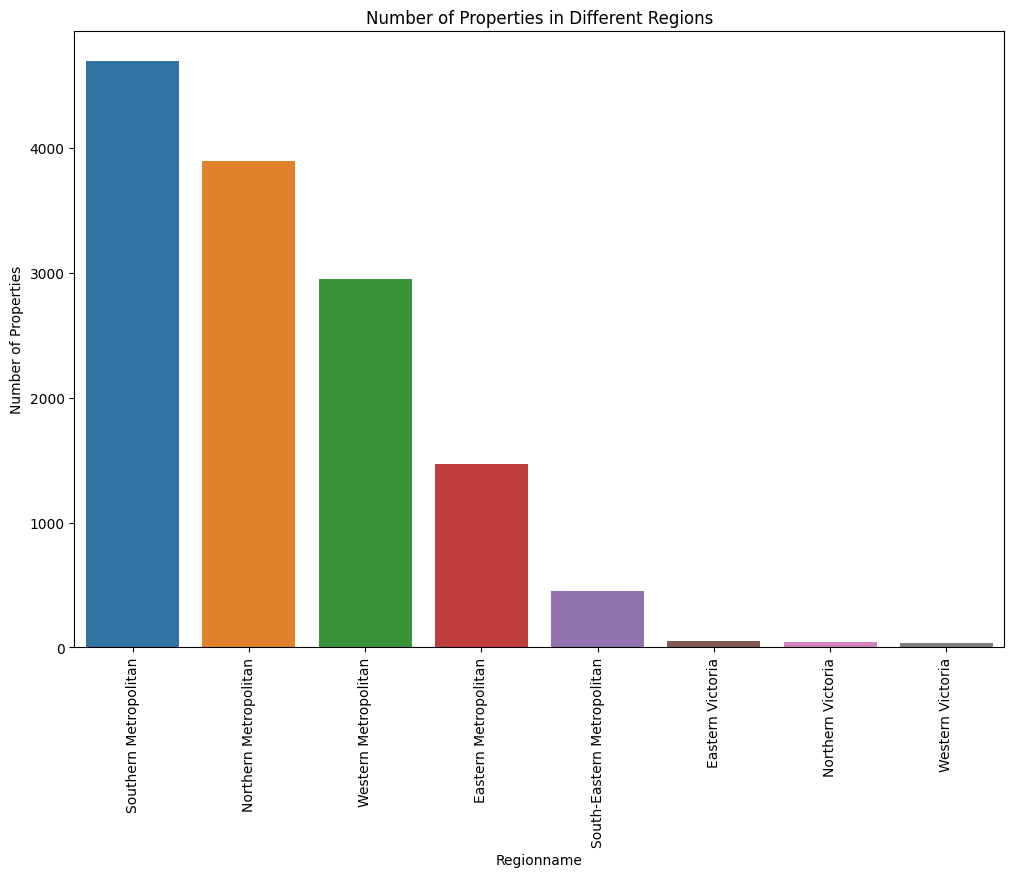

In [46]:
property_count_by_region = df['Regionname'].value_counts().reset_index()
property_count_by_region.columns = ['Regionname', 'Count']
plt.figure(figsize=(12, 8))
sns.barplot(x=property_count_by_region['Regionname'], y=property_count_by_region['Count'])
plt.xlabel('Regionname')
plt.ylabel('Number of Properties')
plt.title('Number of Properties in Different Regions')
plt.xticks(rotation=90)
plt.show()

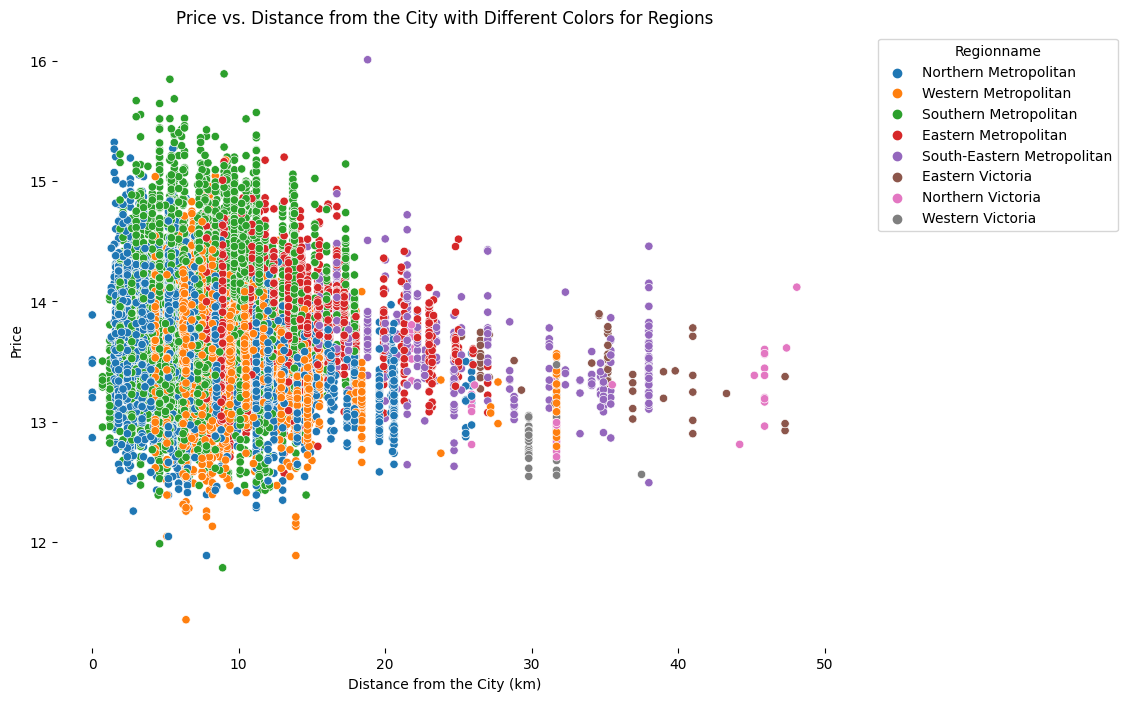

In [49]:
# Apply log transformation to the Price to reduce skewness
df['LogPrice'] = np.log(df['Price'])
# Create the scatter plot
f, ax = plt.subplots(figsize=(10, 8))
sns.despine(f, left=True, bottom=True)

# Scatter plot of Price vs. Distance with different colors for different regions
sns.scatterplot(x="Distance", y="LogPrice",
                hue="Regionname",
                data=df, ax=ax)

plt.xlabel('Distance from the City (km)')
plt.ylabel('Price')
plt.title('Price vs. Distance from the City with Different Colors for Regions')
plt.legend(title='Regionname', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Property prices are influenced by their distance from the city center.

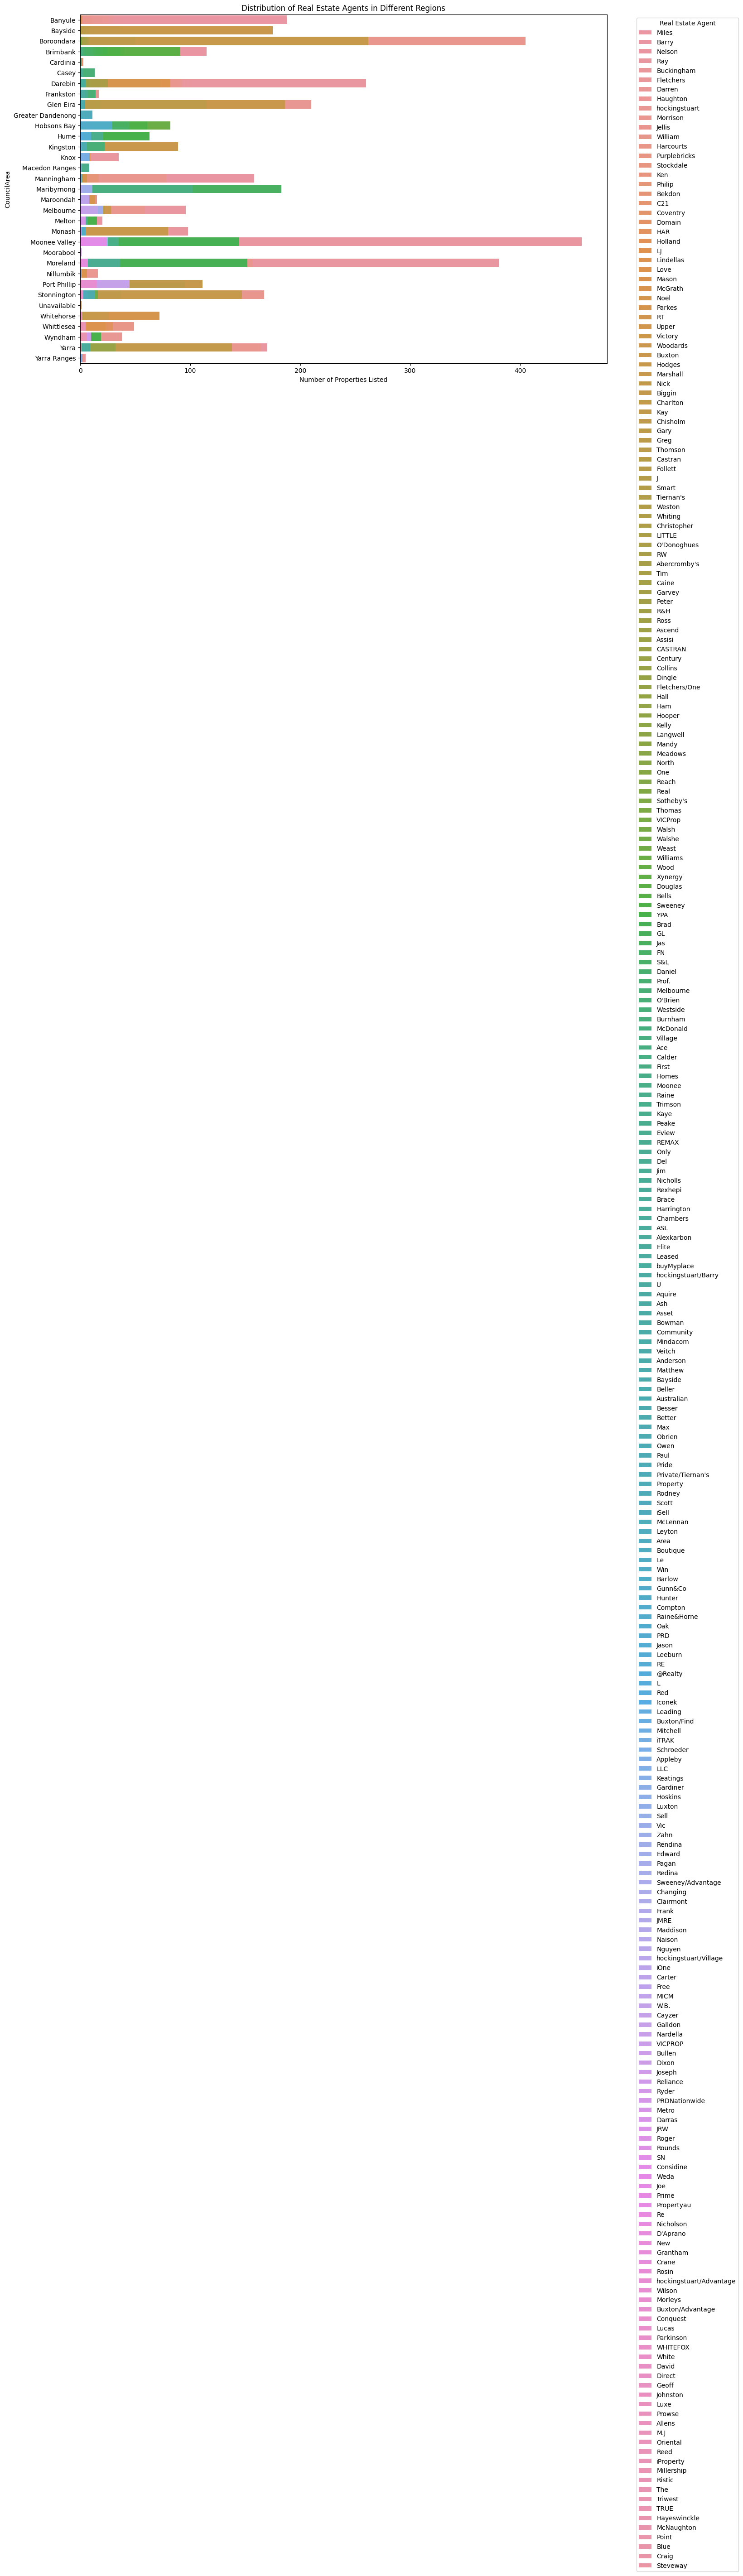

In [52]:
# Group by 'CouncilArea' and 'SellerG' to count the number of properties listed by each agent in each CouncilArea
agent_distribution = df.groupby(['CouncilArea', 'SellerG']).size().reset_index(name='Count')

# Sort the data for better visualization
agent_distribution = agent_distribution.sort_values(by=['CouncilArea', 'Count'], ascending=[True, False])

# Create a bar plot to show the distribution of agents within each CouncilArea
plt.figure(figsize=(15, 10))
sns.barplot(x='Count', y='CouncilArea', hue='SellerG', data=agent_distribution, dodge=False)
plt.xlabel('Number of Properties Listed')
plt.ylabel('CouncilArea')
plt.title('Distribution of Real Estate Agents in Different Regions')
plt.legend(title='Real Estate Agent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

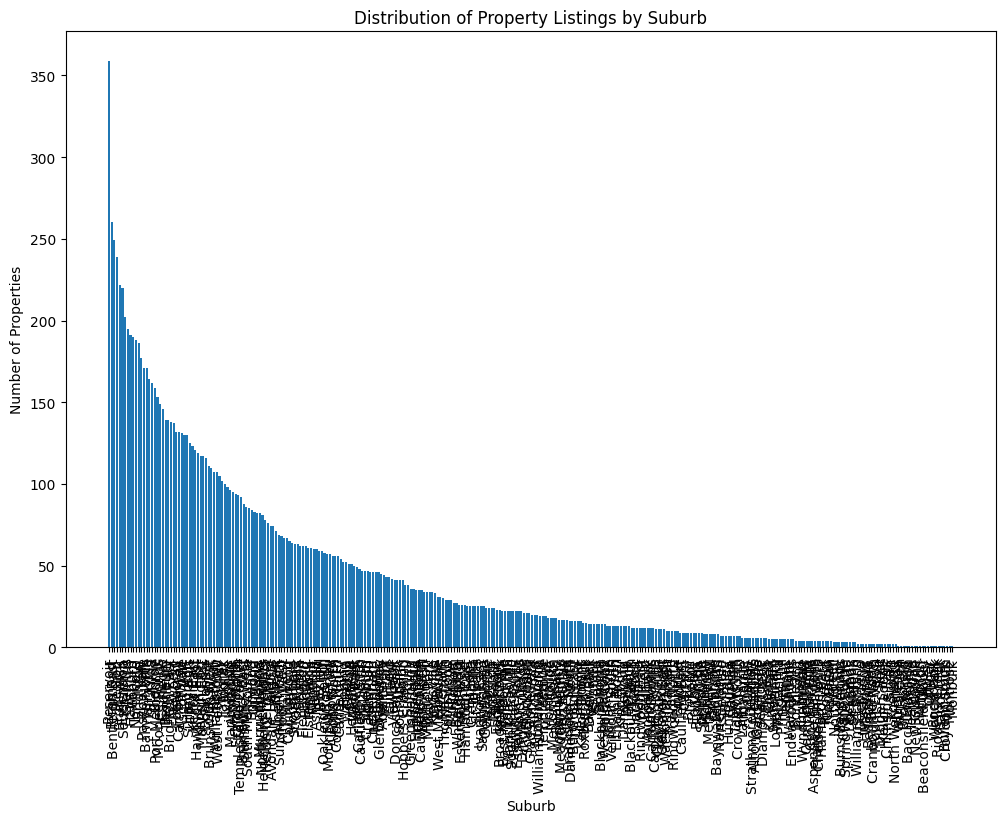

In [37]:
# Plot the distribution of property listings by suburb
plt.figure(figsize=(12, 8))
plt.bar(property_count_by_suburb['Suburb'], property_count_by_suburb['Count'])
plt.xlabel('Suburb')
plt.ylabel('Number of Properties')
plt.title('Distribution of Property Listings by Suburb')
plt.xticks(rotation=90)
plt.show()